In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [10]:
iris = pd.read_csv('dataset/iris.csv')
X = iris.drop(columns=['Species'])
y = iris['Species']

In [11]:
# Convert target labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [13]:
# Initialize individual models
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb_model = XGBClassifier(n_estimators=50, use_label_encoder=False, eval_metric='logloss', random_state=42)

In [14]:

# Create different voting ensembles
# Hard voting (majority voting)
voting_hard = VotingClassifier(
    estimators=[
        ('ada', ada_model),
        ('gbm', gbm_model),
        ('xgb', xgb_model)
    ],
    voting='hard'
)

# Soft voting (weighted probabilities)
voting_soft = VotingClassifier(
    estimators=[
        ('ada', ada_model),
        ('gbm', gbm_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)


In [15]:

# Custom weighted voting (giving different weights to models)
voting_soft_weighted = VotingClassifier(
    estimators=[
        ('ada', ada_model),
        ('gbm', gbm_model),
        ('xgb', xgb_model)
    ],
    voting='soft',
    weights=[1, 2, 2]  # Giving more weight to GBM and XGBoost
)


In [16]:
# Dictionary to store all models
models = {
    'AdaBoost': ada_model,
    'Gradient Boosting (GBM)': gbm_model,
    'XGBoost': xgb_model,
    'Hard Voting Ensemble': voting_hard,
    'Soft Voting Ensemble': voting_soft,
    'Weighted Soft Voting': voting_soft_weighted
}

In [17]:
# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    return accuracy, precision, recall, f1


In [18]:
# Train and evaluate all models
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate and store results
    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred, name)
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

C:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model: AdaBoost
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Model: Gradient Boosting (GBM)
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy            

C:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:29:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:29:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Aniket\AppDat


Model: Hard Voting Ensemble
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



C:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:29:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Model: Soft Voting Ensemble
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Model: Weighted Soft Voting
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy   

C:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:29:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
# Create comparison DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison Summary:")
print(results_df.to_string(index=False))


Model Comparison Summary:
                  Model  Accuracy  Precision  Recall  F1 Score
               AdaBoost       1.0        1.0     1.0       1.0
Gradient Boosting (GBM)       1.0        1.0     1.0       1.0
                XGBoost       1.0        1.0     1.0       1.0
   Hard Voting Ensemble       1.0        1.0     1.0       1.0
   Soft Voting Ensemble       1.0        1.0     1.0       1.0
   Weighted Soft Voting       1.0        1.0     1.0       1.0


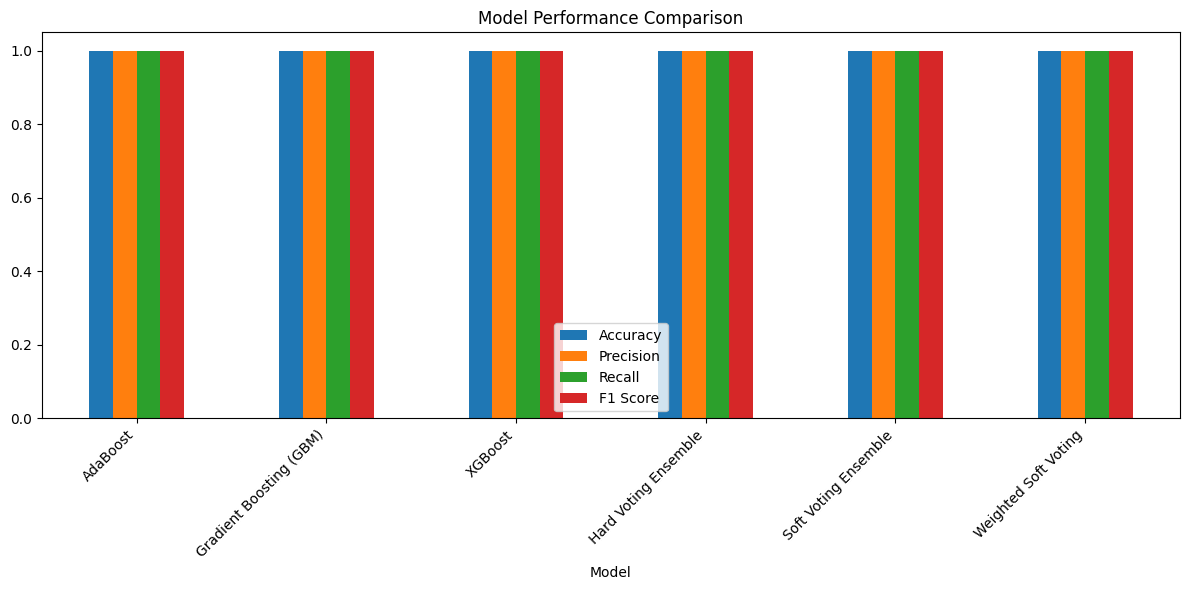

In [20]:
# Visualize results
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
results_df.plot(x='Model', y=metrics, kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
